# Data Pre-processing

In [169]:
import zipfile, os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy import stats
import json

# 1. Unzip the archive
with zipfile.ZipFile('archive.zip', 'r') as z:
    z.extractall('/mnt/data/dataset')
DATA_DIR = '/mnt/data/dataset'

# 2. Load demand data
#   a) “Balance” (Phoenix, Seattle)
df_bal = pd.read_csv(
    os.path.join(DATA_DIR,'cleaned_balance_data.csv'),
    usecols=['local_time','demand','city'],
    engine='python'
)
df_bal['Timestamp'] = pd.to_datetime(df_bal['local_time'])
df_bal = df_bal[['Timestamp','demand','city']]

#   b) “Subregion” (NYC)
df_sub = pd.read_csv(
    os.path.join(DATA_DIR,'cleaned_subregion_data.csv'),
    usecols=['local_time','demand','city'],
    engine='python'
)
df_sub['Timestamp'] = pd.to_datetime(df_sub['local_time'])
df_sub = df_sub[['Timestamp','demand','city']]

#   c) Texas (Houston, San Antonio, Dallas)
df_tex = pd.read_csv(
    os.path.join(DATA_DIR,'cleaned_texas_data.csv'),
    usecols=['date','houston','san antonio','dallas'],
    engine='python'
)
df_tex['Timestamp'] = pd.to_datetime(df_tex['date'])
df_tex = df_tex.melt(
    id_vars=['Timestamp'], var_name='city', value_name='demand'
)
df_tex = df_tex[20423:81692]
df_tex = df_tex.reset_index(drop=True)

In [171]:
df_bal

,Timestamp,demand,city
0,2018-07-01 01:00:00,3497.0,phoenix
1,2018-07-01 02:00:00,3256.0,phoenix
2,2018-07-01 03:00:00,3065.0,phoenix
3,2018-07-01 04:00:00,2929.0,phoenix
4,2018-07-01 05:00:00,2833.0,phoenix
...,...,...,...
31915,2020-04-25 20:00:00,NaN,seattle
31916,2020-04-25 21:00:00,NaN,seattle
31917,2020-04-25 22:00:00,NaN,seattle
31918,2020-04-25 23:00:00,NaN,seattle


In [173]:
df_sub

,Timestamp,demand,city
0,2018-07-01 01:00:00,7269.0,nyc
1,2018-07-01 02:00:00,6977.0,nyc
2,2018-07-01 03:00:00,6725.0,nyc
3,2018-07-01 04:00:00,6539.0,nyc
4,2018-07-01 05:00:00,6415.0,nyc
...,...,...,...
132283,2020-05-19 20:00:00,11578.0,san jose
132284,2020-05-19 21:00:00,11782.0,san jose
132285,2020-05-19 22:00:00,11592.0,san jose
132286,2020-05-19 23:00:00,11083.0,san jose


In [174]:
df_tex

,Timestamp,city,demand
0,2018-01-01 01:00:00,houston,11425.98
1,2018-01-01 02:00:00,houston,11408.42
2,2018-01-01 03:00:00,houston,11405.2
3,2018-01-01 04:00:00,houston,11450.56
4,2018-01-01 05:00:00,houston,11631.34
...,...,...,...
61264,2020-04-30 20:00:00,dallas,13521.17
61265,2020-04-30 21:00:00,dallas,13149.45
61266,2020-04-30 22:00:00,dallas,12673.02
61267,2020-04-30 23:00:00,dallas,11653.34


In [176]:
df_bal.isnull().sum()

Timestamp     0
demand       76
city          0
dtype: int64

In [177]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31920 entries, 0 to 31919
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  31920 non-null  datetime64[ns]
 1   demand     31844 non-null  float64       
 2   city       31920 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 748.3+ KB


In [178]:
df_bal = df_bal.dropna().reset_index(drop=True)

In [180]:
df_bal.isnull().sum()

Timestamp    0
demand       0
city         0
dtype: int64

In [184]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31844 entries, 0 to 31843
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  31844 non-null  datetime64[ns]
 1   demand     31844 non-null  float64       
 2   city       31844 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 746.5+ KB


In [186]:
df_bal

,Timestamp,demand,city
0,2018-07-01 01:00:00,3497.0,phoenix
1,2018-07-01 02:00:00,3256.0,phoenix
2,2018-07-01 03:00:00,3065.0,phoenix
3,2018-07-01 04:00:00,2929.0,phoenix
4,2018-07-01 05:00:00,2833.0,phoenix
...,...,...,...
31839,2020-04-24 20:00:00,1016.0,seattle
31840,2020-04-24 21:00:00,1014.0,seattle
31841,2020-04-24 22:00:00,976.0,seattle
31842,2020-04-24 23:00:00,923.0,seattle


In [187]:
df_sub.isnull().sum()

Timestamp        0
demand       25972
city             0
dtype: int64

In [188]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132288 entries, 0 to 132287
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  132288 non-null  datetime64[ns]
 1   demand     106316 non-null  float64       
 2   city       132288 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.0+ MB


In [190]:
df_sub = df_sub.dropna().reset_index(drop=True)

In [191]:
df_sub.isnull().sum()

Timestamp    0
demand       0
city         0
dtype: int64

In [194]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106316 entries, 0 to 106315
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  106316 non-null  datetime64[ns]
 1   demand     106316 non-null  float64       
 2   city       106316 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.4+ MB


In [196]:
df_sub

,Timestamp,demand,city
0,2018-07-01 01:00:00,7269.0,nyc
1,2018-07-01 02:00:00,6977.0,nyc
2,2018-07-01 03:00:00,6725.0,nyc
3,2018-07-01 04:00:00,6539.0,nyc
4,2018-07-01 05:00:00,6415.0,nyc
...,...,...,...
106311,2020-05-19 20:00:00,11578.0,san jose
106312,2020-05-19 21:00:00,11782.0,san jose
106313,2020-05-19 22:00:00,11592.0,san jose
106314,2020-05-19 23:00:00,11083.0,san jose


In [201]:
df_tex.isnull().sum()

Timestamp    0
city         0
demand       0
dtype: int64

In [202]:
counts = df_tex['city'].value_counts()
print(counts)

city
houston        20423
san antonio    20423
dallas         20423
Name: count, dtype: int64


In [203]:
counts = df_sub['city'].value_counts()
print(counts)

city
nyc             16512
la              16431
san diego       16431
san jose        16431
philadelphia    14735
houston          8592
san antonio      8592
dallas           8592
Name: count, dtype: int64


In [205]:
counts = df_bal['city'].value_counts()
print(counts)

city
phoenix    15936
seattle    15908
Name: count, dtype: int64


In [207]:
# Merge all demand
demand_df = pd.concat([df_bal, df_sub, df_tex], ignore_index=True)
demand_df['city'] = demand_df['city'].str.lower()

In [211]:
# 3. Load weather (JSON per city)
weather_frames = []
for fname in os.listdir(DATA_DIR):
    if fname.endswith('.json'):
        city = fname.replace('.json','')
        arr = json.load(open(os.path.join(DATA_DIR,fname)))
        w = pd.DataFrame(arr)
        w['Timestamp'] = pd.to_datetime(w['time'],unit='s')
        w['city']      = city
        weather_frames.append(
            w[['Timestamp','temperature','humidity','windSpeed','city']]
        )
weather_df = pd.concat(weather_frames, ignore_index=True)
weather_df['city'] = weather_df['city'].str.lower()
weather_df.loc[weather_df['city'] == 'san_diego', 'city'] = 'san diego'
weather_df.loc[weather_df['city'] == 'san_jose', 'city'] = 'san jose'
weather_df.loc[weather_df['city'] == 'san_antonio', 'city'] = 'san antonio'

In [212]:
weather_df

,Timestamp,temperature,humidity,windSpeed,city
0,2018-07-02 05:00:00,89.56,0.45,10.84,dallas
1,2018-07-02 06:00:00,88.35,0.52,9.94,dallas
2,2018-07-02 07:00:00,87.05,0.56,8.92,dallas
3,2018-07-02 08:00:00,86.04,0.58,8.47,dallas
4,2018-07-02 09:00:00,84.80,0.63,5.61,dallas
...,...,...,...,...,...
165735,2020-05-22 02:00:00,52.91,0.75,3.79,seattle
165736,2020-05-22 03:00:00,52.19,0.78,2.94,seattle
165737,2020-05-22 04:00:00,51.22,0.82,3.38,seattle
165738,2020-05-22 05:00:00,50.07,0.87,3.76,seattle


In [213]:
weather_df.isnull().sum()

Timestamp       0
temperature    10
humidity       10
windSpeed      53
city            0
dtype: int64

In [214]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165740 entries, 0 to 165739
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Timestamp    165740 non-null  datetime64[ns]
 1   temperature  165730 non-null  float64       
 2   humidity     165730 non-null  float64       
 3   windSpeed    165687 non-null  float64       
 4   city         165740 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 6.3+ MB


In [219]:
counts = weather_df['city'].value_counts()
print(counts)

city
dallas          16574
houston         16574
la              16574
nyc             16574
philadelphia    16574
phoenix         16574
san antonio     16574
san diego       16574
san jose        16574
seattle         16574
Name: count, dtype: int64


In [221]:
weather_df = weather_df.dropna().reset_index(drop=True)

In [223]:
weather_df.isnull().sum()

Timestamp      0
temperature    0
humidity       0
windSpeed      0
city           0
dtype: int64

In [225]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165687 entries, 0 to 165686
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Timestamp    165687 non-null  datetime64[ns]
 1   temperature  165687 non-null  float64       
 2   humidity     165687 non-null  float64       
 3   windSpeed    165687 non-null  float64       
 4   city         165687 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 6.3+ MB


In [227]:
counts = weather_df['city'].value_counts()
print(counts)

city
dallas          16569
la              16569
nyc             16569
philadelphia    16569
phoenix         16569
san antonio     16569
san jose        16569
seattle         16569
san diego       16568
houston         16567
Name: count, dtype: int64


In [229]:
weather_df

,Timestamp,temperature,humidity,windSpeed,city
0,2018-07-02 05:00:00,89.56,0.45,10.84,dallas
1,2018-07-02 06:00:00,88.35,0.52,9.94,dallas
2,2018-07-02 07:00:00,87.05,0.56,8.92,dallas
3,2018-07-02 08:00:00,86.04,0.58,8.47,dallas
4,2018-07-02 09:00:00,84.80,0.63,5.61,dallas
...,...,...,...,...,...
165682,2020-05-22 02:00:00,52.91,0.75,3.79,seattle
165683,2020-05-22 03:00:00,52.19,0.78,2.94,seattle
165684,2020-05-22 04:00:00,51.22,0.82,3.38,seattle
165685,2020-05-22 05:00:00,50.07,0.87,3.76,seattle


In [231]:
demand_df.isnull().sum()

Timestamp    0
demand       0
city         0
dtype: int64

In [233]:
counts = demand_df['city'].value_counts()
print(counts)

city
houston         29015
san antonio     29015
dallas          29015
nyc             16512
la              16431
san diego       16431
san jose        16431
phoenix         15936
seattle         15908
philadelphia    14735
Name: count, dtype: int64


In [235]:
demand_df

,Timestamp,demand,city
0,2018-07-01 01:00:00,3497.0,phoenix
1,2018-07-01 02:00:00,3256.0,phoenix
2,2018-07-01 03:00:00,3065.0,phoenix
3,2018-07-01 04:00:00,2929.0,phoenix
4,2018-07-01 05:00:00,2833.0,phoenix
...,...,...,...
199424,2020-04-30 20:00:00,13521.17,dallas
199425,2020-04-30 21:00:00,13149.45,dallas
199426,2020-04-30 22:00:00,12673.02,dallas
199427,2020-04-30 23:00:00,11653.34,dallas


In [237]:
demand_df = demand_df.sort_values(by='city').reset_index(drop=True)

In [238]:
demand_df

,Timestamp,demand,city
0,2020-04-30 00:00:00,10505.68,dallas
1,2018-02-14 15:00:00,11618.72,dallas
2,2018-02-14 16:00:00,11491.75,dallas
3,2018-02-14 17:00:00,11528.98,dallas
4,2018-02-14 18:00:00,11626.19,dallas
...,...,...,...
199424,2020-03-21 18:00:00,1054.0,seattle
199425,2020-03-21 17:00:00,1038.0,seattle
199426,2020-03-21 16:00:00,1046.0,seattle
199427,2020-03-22 05:00:00,885.0,seattle


In [241]:
df = demand_df.merge(weather_df, on=['city','Timestamp'], how='inner')
print("Combined dataset:", df.shape)

Combined dataset: (186097, 6)


In [243]:
df.isnull().sum()

Timestamp      0
demand         0
city           0
temperature    0
humidity       0
windSpeed      0
dtype: int64

In [245]:
counts = df['city'].value_counts()
print(counts)

city
dallas          24630
san antonio     24630
houston         24628
nyc             16470
la              16410
san jose        16410
san diego       16409
phoenix         15915
seattle         15887
philadelphia    14708
Name: count, dtype: int64


In [247]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed
0,2020-04-30 00:00:00,10505.68,dallas,76.48,0.28,13.19
1,2020-04-18 03:00:00,8870.0,dallas,54.23,0.69,6.27
2,2020-04-18 04:00:00,8843.0,dallas,53.07,0.72,6.14
3,2020-04-18 05:00:00,8995.0,dallas,51.84,0.74,5.59
4,2020-04-18 06:00:00,9302.0,dallas,50.74,0.76,4.77
...,...,...,...,...,...,...
186092,2020-03-21 18:00:00,1054.0,seattle,45.25,0.81,2.04
186093,2020-03-21 17:00:00,1038.0,seattle,43.75,0.85,2.25
186094,2020-03-21 16:00:00,1046.0,seattle,42.02,0.88,3.21
186095,2020-03-22 05:00:00,885.0,seattle,44.73,0.79,2.08


In [249]:
import pandas as pd
from pandasql import sqldf

# Define a function to run SQL queries
mysql = lambda q: sqldf(q, globals())

# SQL query
query = "SELECT * FROM df WHERE city = 'san antonio' and Timestamp = '2020-04-30 10:00:00.000000'"
result = mysql(query)

result

,Timestamp,demand,city,temperature,humidity,windSpeed
0,2020-04-30 10:00:00.000000,5162.00,san antonio,52.98,0.8,3.46
1,2020-04-30 10:00:00.000000,5267.51,san antonio,52.98,0.8,3.46


In [250]:
df = df.drop_duplicates(subset=['Timestamp', 'city']).reset_index(drop=True)

In [251]:
# Define a function to run SQL queries
mysql = lambda q: sqldf(q, globals())

# SQL query
query = "SELECT * FROM df WHERE city = 'san antonio' and Timestamp = '2020-04-30 10:00:00.000000'"
result = mysql(query)

result

,Timestamp,demand,city,temperature,humidity,windSpeed
0,2020-04-30 10:00:00.000000,5162.0,san antonio,52.98,0.8,3.46


In [252]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed
0,2020-04-30 00:00:00,10505.68,dallas,76.48,0.28,13.19
1,2020-04-18 03:00:00,8870.0,dallas,54.23,0.69,6.27
2,2020-04-18 04:00:00,8843.0,dallas,53.07,0.72,6.14
3,2020-04-18 05:00:00,8995.0,dallas,51.84,0.74,5.59
4,2020-04-18 06:00:00,9302.0,dallas,50.74,0.76,4.77
...,...,...,...,...,...,...
160845,2020-03-21 18:00:00,1054.0,seattle,45.25,0.81,2.04
160846,2020-03-21 17:00:00,1038.0,seattle,43.75,0.85,2.25
160847,2020-03-21 16:00:00,1046.0,seattle,42.02,0.88,3.21
160848,2020-03-22 05:00:00,885.0,seattle,44.73,0.79,2.08


In [257]:
df = df.sort_values(by='Timestamp').reset_index(drop=True)

In [259]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed
0,2018-07-01 07:00:00,2764.0,phoenix,86.82,0.16,4.30
1,2018-07-01 07:00:00,774.0,seattle,59.32,0.86,4.81
2,2018-07-01 07:00:00,10653.0,san jose,67.78,0.60,6.36
3,2018-07-01 07:00:00,1737.0,san diego,61.71,0.80,3.53
4,2018-07-01 07:00:00,9353.0,la,65.45,0.79,4.23
...,...,...,...,...,...,...
160845,2020-05-19 23:00:00,11083.0,san jose,67.50,0.47,12.06
160846,2020-05-20 00:00:00,4206.0,nyc,57.55,0.45,14.09
160847,2020-05-20 00:00:00,10506.0,san jose,66.88,0.47,8.58
160848,2020-05-20 00:00:00,9621.0,la,72.33,0.41,7.30


In [261]:
# df.to_csv('electric_load_and_weather_data.csv', index=False)
# weather_df.to_csv('weather_data.csv', index=False)
# demand_df.to_csv('electricity_data.csv', index=False)

In [263]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed
0,2018-07-01 07:00:00,2764.0,phoenix,86.82,0.16,4.30
1,2018-07-01 07:00:00,774.0,seattle,59.32,0.86,4.81
2,2018-07-01 07:00:00,10653.0,san jose,67.78,0.60,6.36
3,2018-07-01 07:00:00,1737.0,san diego,61.71,0.80,3.53
4,2018-07-01 07:00:00,9353.0,la,65.45,0.79,4.23
...,...,...,...,...,...,...
160845,2020-05-19 23:00:00,11083.0,san jose,67.50,0.47,12.06
160846,2020-05-20 00:00:00,4206.0,nyc,57.55,0.45,14.09
160847,2020-05-20 00:00:00,10506.0,san jose,66.88,0.47,8.58
160848,2020-05-20 00:00:00,9621.0,la,72.33,0.41,7.30


In [265]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month

# Define seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

In [267]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season
0,2018-07-01 07:00:00,2764.0,phoenix,86.82,0.16,4.30,7,6,7,Summer
1,2018-07-01 07:00:00,774.0,seattle,59.32,0.86,4.81,7,6,7,Summer
2,2018-07-01 07:00:00,10653.0,san jose,67.78,0.60,6.36,7,6,7,Summer
3,2018-07-01 07:00:00,1737.0,san diego,61.71,0.80,3.53,7,6,7,Summer
4,2018-07-01 07:00:00,9353.0,la,65.45,0.79,4.23,7,6,7,Summer
...,...,...,...,...,...,...,...,...,...,...
160845,2020-05-19 23:00:00,11083.0,san jose,67.50,0.47,12.06,23,1,5,Spring
160846,2020-05-20 00:00:00,4206.0,nyc,57.55,0.45,14.09,0,2,5,Spring
160847,2020-05-20 00:00:00,10506.0,san jose,66.88,0.47,8.58,0,2,5,Spring
160848,2020-05-20 00:00:00,9621.0,la,72.33,0.41,7.30,0,2,5,Spring


In [269]:
scaler = StandardScaler()
df[['demand', 'temperature', 'humidity', 'windSpeed']] = scaler.fit_transform(df[['demand', 'temperature', 'humidity', 'windSpeed']])

In [271]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season
0,2018-07-01 07:00:00,-0.943958,phoenix,1.512200,-2.267821,-0.452663,7,6,7,Summer
1,2018-07-01 07:00:00,-1.364911,seattle,-0.227566,0.946841,-0.305977,7,6,7,Summer
2,2018-07-01 07:00:00,0.724833,san jose,0.307650,-0.247176,0.139833,7,6,7,Summer
3,2018-07-01 07:00:00,-1.161204,san diego,-0.076364,0.671299,-0.674130,7,6,7,Summer
4,2018-07-01 07:00:00,0.449838,la,0.160244,0.625375,-0.472796,7,6,7,Summer
...,...,...,...,...,...,...,...,...,...,...
160845,2020-05-19 23:00:00,0.815792,san jose,0.289936,-0.844185,1.779262,23,1,5,Spring
160846,2020-05-20 00:00:00,-0.638926,nyc,-0.339543,-0.936032,2.363129,0,2,5,Spring
160847,2020-05-20 00:00:00,0.693737,san jose,0.250712,-0.844185,0.778347,0,2,5,Spring
160848,2020-05-20 00:00:00,0.506530,la,0.595502,-1.119727,0.410195,0,2,5,Spring


In [273]:
df['date'] = df['Timestamp'].dt.date
daily_summary = df.groupby(['city', 'date']).agg({
    'demand': ['mean', 'max', 'min', 'std'],
    'temperature': ['mean', 'max', 'min'],
    'humidity': ['mean', 'max', 'min'],
    'windSpeed': ['mean', 'max', 'min']
}).reset_index()

daily_summary.head()

city        date    demand                               temperature  \
                           mean       max       min       std        mean   
0  dallas  2018-07-02  2.671049  3.639634  1.398928  0.830045    1.695433   
1  dallas  2018-07-03  2.481137  3.639469  1.354192  0.860124    1.785238   
2  dallas  2018-07-04  1.979759  2.833155  1.114476  0.632241    1.460007   
3  dallas  2018-07-05  2.096571  3.296425  0.923844  0.868084    1.336062   
4  dallas  2018-07-06  2.064887  3.119991  1.241343  0.618384    1.476087   

                       humidity                     windSpeed            \
        max       min      mean       max       min      mean       max   
0  2.458632  1.113636 -0.650822  0.303909 -1.900431  0.433053  1.428367   
1  2.500387  1.037086 -0.937946  0.349833 -2.038202  0.230073  1.152252   
2  2.492163  0.928904 -0.400255  0.395756 -2.038202  0.538305  2.532825   
3  2.205576  0.746071 -0.168723  0.854994 -1.349346  0.085664  2.498311   
4  2.101822  1.125023 -0.229955  0.441680 -1.303422  0.050910  1.051586   

             
        min  
0 -0.524568  
1 -0.418149  
2 -1.283882  
3 -1.234987  
4 -0.944492

In [275]:
# Anomaly detection using Z-score, IQR, and Isolation Forest
# Z-score method
z_scores = np.abs(stats.zscore(df[['demand', 'temperature', 'humidity', 'windSpeed']]))
df['z_score_anomaly'] = (z_scores > 3).any(axis=1)

# IQR method
Q1 = df[['demand', 'temperature', 'humidity', 'windSpeed']].quantile(0.25)
Q3 = df[['demand', 'temperature', 'humidity', 'windSpeed']].quantile(0.75)
IQR = Q3 - Q1
df['iqr_anomaly'] = ((df[['demand', 'temperature', 'humidity', 'windSpeed']] < (Q1 - 1.5 * IQR)) | (df[['demand', 'temperature', 'humidity', 'windSpeed']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Isolation Forest method for anomaly detection
iso_forest = IsolationForest(contamination=0.01)
df['iso_forest_anomaly'] = iso_forest.fit_predict(df[['demand', 'temperature', 'humidity', 'windSpeed']])

df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season,date,z_score_anomaly,iqr_anomaly,iso_forest_anomaly
0,2018-07-01 07:00:00,-0.943958,phoenix,1.512200,-2.267821,-0.452663,7,6,7,Summer,2018-07-01,False,False,1
1,2018-07-01 07:00:00,-1.364911,seattle,-0.227566,0.946841,-0.305977,7,6,7,Summer,2018-07-01,False,False,1
2,2018-07-01 07:00:00,0.724833,san jose,0.307650,-0.247176,0.139833,7,6,7,Summer,2018-07-01,False,False,1
3,2018-07-01 07:00:00,-1.161204,san diego,-0.076364,0.671299,-0.674130,7,6,7,Summer,2018-07-01,False,False,1
4,2018-07-01 07:00:00,0.449838,la,0.160244,0.625375,-0.472796,7,6,7,Summer,2018-07-01,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160845,2020-05-19 23:00:00,0.815792,san jose,0.289936,-0.844185,1.779262,23,1,5,Spring,2020-05-19,False,False,1
160846,2020-05-20 00:00:00,-0.638926,nyc,-0.339543,-0.936032,2.363129,0,2,5,Spring,2020-05-20,False,False,1
160847,2020-05-20 00:00:00,0.693737,san jose,0.250712,-0.844185,0.778347,0,2,5,Spring,2020-05-20,False,False,1
160848,2020-05-20 00:00:00,0.506530,la,0.595502,-1.119727,0.410195,0,2,5,Spring,2020-05-20,False,False,1


In [277]:
counts = df['z_score_anomaly'].value_counts()
print(counts)

z_score_anomaly
False    158317
True       2533
Name: count, dtype: int64


In [279]:
counts = df['iqr_anomaly'].value_counts()
print(counts)

iqr_anomaly
False    156616
True       4234
Name: count, dtype: int64


In [281]:
counts = df['iso_forest_anomaly'].value_counts()
print(counts)

iso_forest_anomaly
 1    159241
-1      1609
Name: count, dtype: int64


In [283]:
df = df.drop(df[df['z_score_anomaly'] == True].index).reset_index(drop=True)

In [285]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season,date,z_score_anomaly,iqr_anomaly,iso_forest_anomaly
0,2018-07-01 07:00:00,-0.943958,phoenix,1.512200,-2.267821,-0.452663,7,6,7,Summer,2018-07-01,False,False,1
1,2018-07-01 07:00:00,-1.364911,seattle,-0.227566,0.946841,-0.305977,7,6,7,Summer,2018-07-01,False,False,1
2,2018-07-01 07:00:00,0.724833,san jose,0.307650,-0.247176,0.139833,7,6,7,Summer,2018-07-01,False,False,1
3,2018-07-01 07:00:00,-1.161204,san diego,-0.076364,0.671299,-0.674130,7,6,7,Summer,2018-07-01,False,False,1
4,2018-07-01 07:00:00,0.449838,la,0.160244,0.625375,-0.472796,7,6,7,Summer,2018-07-01,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158312,2020-05-19 23:00:00,0.815792,san jose,0.289936,-0.844185,1.779262,23,1,5,Spring,2020-05-19,False,False,1
158313,2020-05-20 00:00:00,-0.638926,nyc,-0.339543,-0.936032,2.363129,0,2,5,Spring,2020-05-20,False,False,1
158314,2020-05-20 00:00:00,0.693737,san jose,0.250712,-0.844185,0.778347,0,2,5,Spring,2020-05-20,False,False,1
158315,2020-05-20 00:00:00,0.506530,la,0.595502,-1.119727,0.410195,0,2,5,Spring,2020-05-20,False,False,1


In [287]:
#df.to_csv('electric_load_and_weather_data.csv', index=False)

In [289]:
df = df.drop(columns=['date', 'z_score_anomaly', 'iqr_anomaly'])

In [291]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season,iso_forest_anomaly
0,2018-07-01 07:00:00,-0.943958,phoenix,1.512200,-2.267821,-0.452663,7,6,7,Summer,1
1,2018-07-01 07:00:00,-1.364911,seattle,-0.227566,0.946841,-0.305977,7,6,7,Summer,1
2,2018-07-01 07:00:00,0.724833,san jose,0.307650,-0.247176,0.139833,7,6,7,Summer,1
3,2018-07-01 07:00:00,-1.161204,san diego,-0.076364,0.671299,-0.674130,7,6,7,Summer,1
4,2018-07-01 07:00:00,0.449838,la,0.160244,0.625375,-0.472796,7,6,7,Summer,1
...,...,...,...,...,...,...,...,...,...,...,...
158312,2020-05-19 23:00:00,0.815792,san jose,0.289936,-0.844185,1.779262,23,1,5,Spring,1
158313,2020-05-20 00:00:00,-0.638926,nyc,-0.339543,-0.936032,2.363129,0,2,5,Spring,1
158314,2020-05-20 00:00:00,0.693737,san jose,0.250712,-0.844185,0.778347,0,2,5,Spring,1
158315,2020-05-20 00:00:00,0.506530,la,0.595502,-1.119727,0.410195,0,2,5,Spring,1


In [297]:
df = df.drop(df[df['iso_forest_anomaly'] == -1].index).reset_index(drop=True)

In [299]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season,iso_forest_anomaly
0,2018-07-01 07:00:00,-0.943958,phoenix,1.512200,-2.267821,-0.452663,7,6,7,Summer,1
1,2018-07-01 07:00:00,-1.364911,seattle,-0.227566,0.946841,-0.305977,7,6,7,Summer,1
2,2018-07-01 07:00:00,0.724833,san jose,0.307650,-0.247176,0.139833,7,6,7,Summer,1
3,2018-07-01 07:00:00,-1.161204,san diego,-0.076364,0.671299,-0.674130,7,6,7,Summer,1
4,2018-07-01 07:00:00,0.449838,la,0.160244,0.625375,-0.472796,7,6,7,Summer,1
...,...,...,...,...,...,...,...,...,...,...,...
157510,2020-05-19 23:00:00,0.815792,san jose,0.289936,-0.844185,1.779262,23,1,5,Spring,1
157511,2020-05-20 00:00:00,-0.638926,nyc,-0.339543,-0.936032,2.363129,0,2,5,Spring,1
157512,2020-05-20 00:00:00,0.693737,san jose,0.250712,-0.844185,0.778347,0,2,5,Spring,1
157513,2020-05-20 00:00:00,0.506530,la,0.595502,-1.119727,0.410195,0,2,5,Spring,1


In [301]:
counts = df['iso_forest_anomaly'].value_counts()
print(counts)

iso_forest_anomaly
1    157515
Name: count, dtype: int64


In [303]:
df = df.drop(columns=['iso_forest_anomaly'])

In [305]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season
0,2018-07-01 07:00:00,-0.943958,phoenix,1.512200,-2.267821,-0.452663,7,6,7,Summer
1,2018-07-01 07:00:00,-1.364911,seattle,-0.227566,0.946841,-0.305977,7,6,7,Summer
2,2018-07-01 07:00:00,0.724833,san jose,0.307650,-0.247176,0.139833,7,6,7,Summer
3,2018-07-01 07:00:00,-1.161204,san diego,-0.076364,0.671299,-0.674130,7,6,7,Summer
4,2018-07-01 07:00:00,0.449838,la,0.160244,0.625375,-0.472796,7,6,7,Summer
...,...,...,...,...,...,...,...,...,...,...
157510,2020-05-19 23:00:00,0.815792,san jose,0.289936,-0.844185,1.779262,23,1,5,Spring
157511,2020-05-20 00:00:00,-0.638926,nyc,-0.339543,-0.936032,2.363129,0,2,5,Spring
157512,2020-05-20 00:00:00,0.693737,san jose,0.250712,-0.844185,0.778347,0,2,5,Spring
157513,2020-05-20 00:00:00,0.506530,la,0.595502,-1.119727,0.410195,0,2,5,Spring


# Clustering

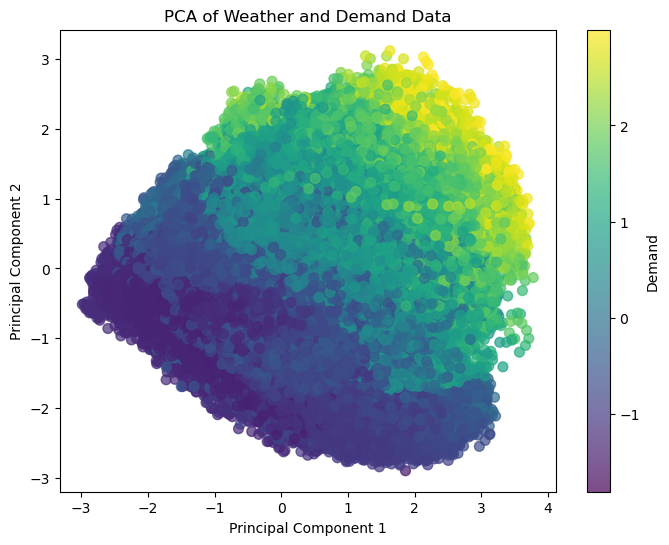

In [308]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Dimensionality Reduction using PCA
# We will use the scaled weather and demand data for PCA
features = ['temperature', 'humidity', 'windSpeed', 'demand']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])

# Plotting the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['demand'], cmap='viridis', s=50, alpha=0.7)
plt.title('PCA of Weather and Demand Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Demand')
plt.show()

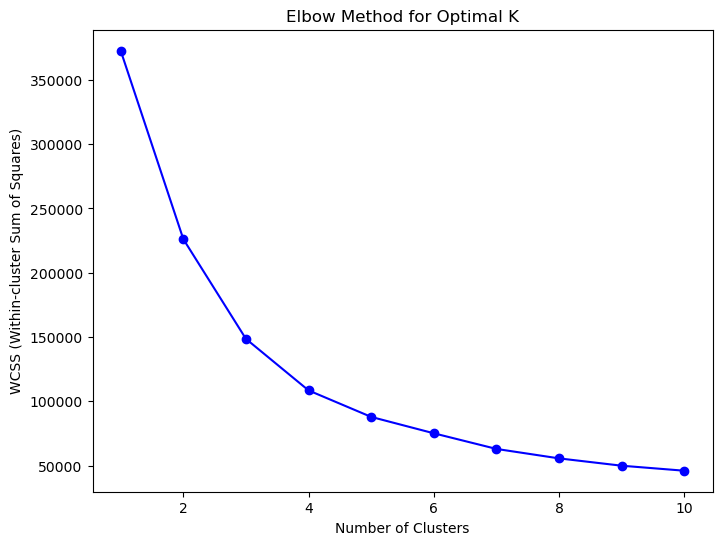

In [310]:
# 2. Clustering with K-Means - Elbow Method to determine optimal k
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

# Based on the elbow plot, choose the optimal k, for instance, k=3.


In [326]:
# 3. DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_result)

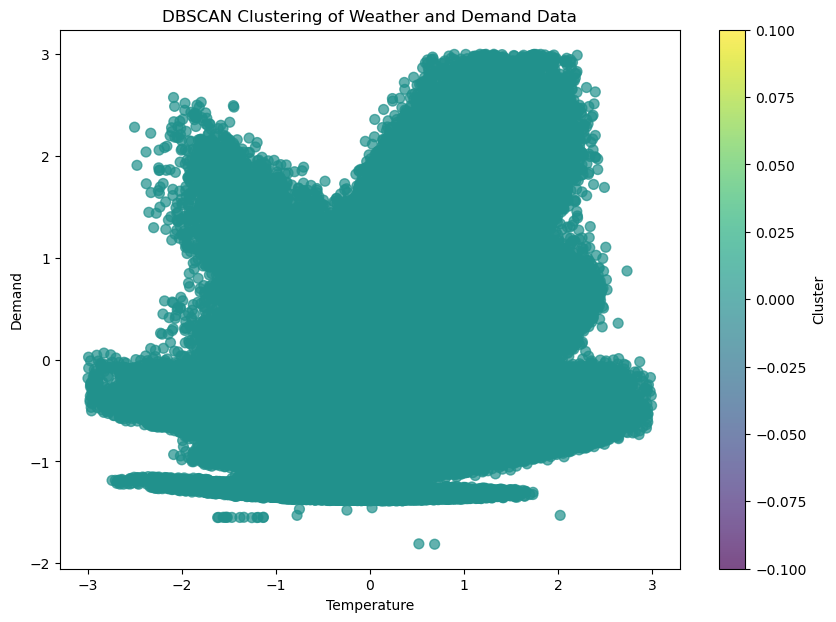

In [328]:
# Visualize the DBSCAN clustering results
plt.figure(figsize=(10, 7))
plt.scatter(df['temperature'], df['demand'], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering of Weather and Demand Data')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.colorbar(label='Cluster')
plt.show()

In [313]:
# KMeans with k=3 for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

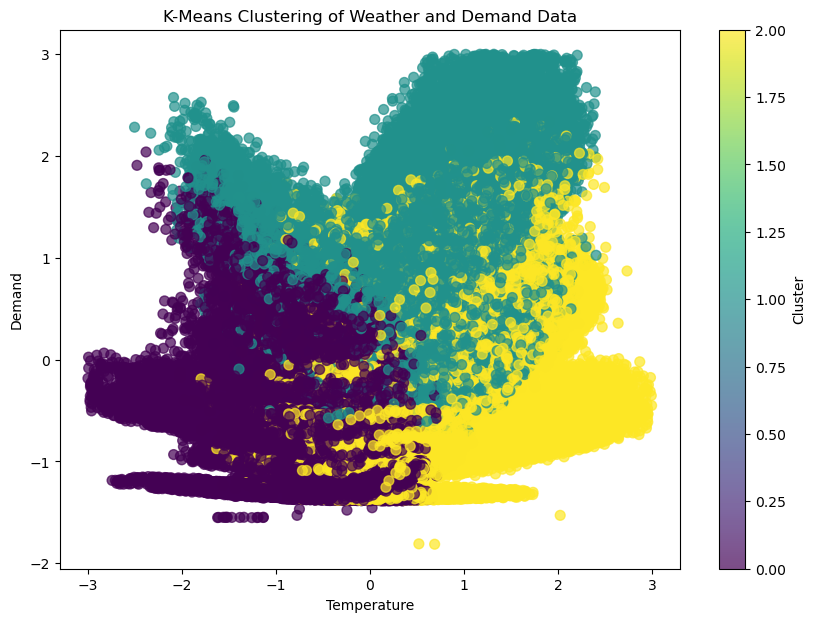

In [318]:
# Visualize the DBSCAN clustering results
plt.figure(figsize=(10, 7))
plt.scatter(df['temperature'], df['demand'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering of Weather and Demand Data')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.colorbar(label='Cluster')
plt.show()

In [320]:
# 5. Evaluation using Silhouette Score
silhouette_kmeans = silhouette_score(pca_result, kmeans_labels)
silhouette_dbscan = silhouette_score(pca_result, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # Silhouette score for DBSCAN only if there are clusters

# Display the results
silhouette_kmeans, silhouette_dbscan

(0.3844546295642308, -1)

# Predictive Modeling

In [335]:
df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season
0,2018-07-01 07:00:00,-0.943958,phoenix,1.512200,-2.267821,-0.452663,7,6,7,Summer
1,2018-07-01 07:00:00,-1.364911,seattle,-0.227566,0.946841,-0.305977,7,6,7,Summer
2,2018-07-01 07:00:00,0.724833,san jose,0.307650,-0.247176,0.139833,7,6,7,Summer
3,2018-07-01 07:00:00,-1.161204,san diego,-0.076364,0.671299,-0.674130,7,6,7,Summer
4,2018-07-01 07:00:00,0.449838,la,0.160244,0.625375,-0.472796,7,6,7,Summer
...,...,...,...,...,...,...,...,...,...,...
157510,2020-05-19 23:00:00,0.815792,san jose,0.289936,-0.844185,1.779262,23,1,5,Spring
157511,2020-05-20 00:00:00,-0.638926,nyc,-0.339543,-0.936032,2.363129,0,2,5,Spring
157512,2020-05-20 00:00:00,0.693737,san jose,0.250712,-0.844185,0.778347,0,2,5,Spring
157513,2020-05-20 00:00:00,0.506530,la,0.595502,-1.119727,0.410195,0,2,5,Spring


In [423]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Step 1: Filter data for one city (e.g., Phoenix)
city_df = df

# Step 2: Convert Timestamp and create target variable (24-hour ahead demand)
# city_df['Timestamp'] = pd.to_datetime(city_df['Timestamp'])
# city_df = city_df.sort_values(by='Timestamp')
city_df['demand_next_day'] = city_df['demand'].shift(-24)
city_df = city_df.dropna(subset=['demand_next_day'])

# Step 3: Feature Engineering
feature_cols = ['temperature', 'humidity', 'windSpeed', 'hour', 'day_of_week', 'month']
X = city_df[feature_cols]
y = city_df['demand_next_day']

# Time-based Train/Test split (80/20)
split_index = int(len(city_df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Step 4: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# Step 5: Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mape_poly = np.mean(np.abs((y_test - y_pred_poly) / y_test)) * 100

In [441]:
y_pred_lr

array([-0.40716991, -0.31202113, -0.29978045, ...,  0.15030335,
        0.01526293,  0.14648764])

In [443]:
y_pred_poly

array([-0.21824627, -0.32226199, -0.3054046 , ...,  0.23783751,
        0.14041932,  0.20074281])

In [445]:
# Display results
results_df = pd.DataFrame({
    "MAE": [mae_lr, mae_poly],
    "RMSE": [rmse_lr, rmse_poly],
    "MAPE": [mape_lr, mape_poly]
}, index=["Linear Regression", "Polynomial Regression (deg=2)"])

results_df

,MAE,RMSE,MAPE
Linear Regression,0.755544,0.842487,108.894041
Polynomial Regression (deg=2),0.744906,0.835530,110.912009


In [447]:
city_df

,Timestamp,demand,city,temperature,humidity,windSpeed,hour,day_of_week,month,season,demand_next_day
0,2018-07-01 07:00:00,-0.943958,phoenix,1.512200,-2.267821,-0.452663,7,6,7,Summer,-1.324508
1,2018-07-01 07:00:00,-1.364911,seattle,-0.227566,0.946841,-0.305977,7,6,7,Summer,0.819177
2,2018-07-01 07:00:00,0.724833,san jose,0.307650,-0.247176,0.139833,7,6,7,Summer,1.120612
3,2018-07-01 07:00:00,-1.161204,san diego,-0.076364,0.671299,-0.674130,7,6,7,Summer,-1.217472
4,2018-07-01 07:00:00,0.449838,la,0.160244,0.625375,-0.472796,7,6,7,Summer,-0.720367
...,...,...,...,...,...,...,...,...,...,...,...
157486,2020-05-19 16:00:00,-1.272047,san diego,0.092551,-0.293100,0.870386,16,1,5,Spring,0.815792
157487,2020-05-19 17:00:00,0.506318,san jose,-0.138996,-0.155328,-0.852454,17,1,5,Spring,-0.638926
157488,2020-05-19 17:00:00,0.509703,la,0.268426,-0.614566,-1.165959,17,1,5,Spring,0.693737
157489,2020-05-19 17:00:00,-1.253221,san diego,0.169101,-0.430871,1.212653,17,1,5,Spring,0.506530


In [449]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: ARIMA/SARIMA — Time Series Model
# We'll use a simplified univariate series: hourly demand of Phoenix
# city_df['Timestamp'] = pd.to_datetime(city_df['Timestamp'])
# city_df.set_index('Timestamp', inplace=True)
daily_df = city_df[city_df['city'] == 'phoenix']
daily_ts = daily_df['demand']

# 2. Split into train/test
train_size = int(len(daily_ts) * 0.8)
train_ts = daily_ts[:train_size]
test_ts = daily_ts[train_size:]

# SARIMA: seasonal_order=(1,1,1,24) for daily seasonality
sarima_model = SARIMAX(train_ts, order=(1,1,1), seasonal_order=(1,1,1,7), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)
y_pred_sarima = sarima_result.predict(start=test_ts.index[0], end=test_ts.index[-1])

C:\Users\ihuza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ihuza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ihuza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ihuza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [451]:
y_pred_sarima

121827   -6.556928
121828   -6.558141
121829   -6.557567
121830   -6.557382
121831   -6.557213
            ...   
152907   -8.126073
152908   -8.127286
152909   -8.126712
152910   -8.126527
152911   -8.126358
Name: predicted_mean, Length: 31085, dtype: float64

In [465]:
!pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


In [469]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Step 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

In [475]:
# Step 3: XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

# Display results
model_results = pd.DataFrame({
    "MAE": [mae_rf, mae_xgb],
    "RMSE": [rmse_rf, rmse_xgb],
    "MAPE": [mape_rf, mape_xgb]
}, index=["Random Forest", "XGBoost"])

In [477]:
model_results

,MAE,RMSE,MAPE
Random Forest,0.748517,0.846724,121.161123
XGBoost,0.739411,0.824423,112.098766


In [481]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [483]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train ANN
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
ann_model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, verbose=0, validation_split=0.2)

# Predict and evaluate
y_pred_ann = ann_model.predict(X_test_scaled).flatten()
mae_ann = mean_absolute_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
mape_ann = np.mean(np.abs((y_test - y_pred_ann) / y_test)) * 100

# Show ANN results
ann_results = pd.DataFrame({
    "MAE": [mae_ann],
    "RMSE": [rmse_ann],
    "MAPE": [mape_ann]
}, index=["Feedforward ANN"])

C:\Users\ihuza\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [485]:
ann_results

,MAE,RMSE,MAPE
Feedforward ANN,0.743738,0.823555,109.120356


In [487]:
city_df['naive_forecast'] = city_df['demand'].shift(24)

# Remove rows with NaNs
baseline_df = city_df.dropna(subset=['demand_next_day', 'naive_forecast'])

# Time-based split
split_index = int(len(baseline_df) * 0.8)
baseline_test = baseline_df.iloc[split_index:]

# Evaluate naive forecast
mae_baseline = mean_absolute_error(baseline_test['demand_next_day'], baseline_test['naive_forecast'])
rmse_baseline = np.sqrt(mean_squared_error(baseline_test['demand_next_day'], baseline_test['naive_forecast']))
mape_baseline = np.mean(np.abs((baseline_test['demand_next_day'] - baseline_test['naive_forecast']) / baseline_test['demand_next_day'])) * 100

# Display results
baseline_results = pd.DataFrame({
    "MAE": [mae_baseline],
    "RMSE": [rmse_baseline],
    "MAPE": [mape_baseline]
}, index=["Naive Baseline (Previous Day Same Hour)"])

C:\Users\ihuza\AppData\Local\Temp\ipykernel_17816\4184381875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['naive_forecast'] = city_df['demand'].shift(24)


In [489]:
baseline_results

,MAE,RMSE,MAPE
Naive Baseline (Previous Day Same Hour),0.939568,1.167677,210.519502


In [491]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Prepare data again
city_df1 = df
city_df1['demand_next_day'] = city_df1['demand'].shift(-24)
city_df1 = city_df1.dropna(subset=['demand_next_day'])

# Feature columns and target
feature_cols = ['temperature', 'humidity', 'windSpeed', 'hour', 'day_of_week', 'month']
X = city_df1[feature_cols]
y = city_df1['demand_next_day']

# Train-test split (time-based)
split_index = int(len(city_df1) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Normalize for stacking
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base learners
base_learners = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Stacking ensemble
stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=LinearRegression(),
    cv=5
)

stacking_model.fit(X_train_scaled, y_train)
y_pred_stack = stacking_model.predict(X_test_scaled)

# Evaluate
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mape_stack = np.mean(np.abs((y_test - y_pred_stack) / y_test)) * 100

# Show results
ensemble_results = pd.DataFrame({
    "MAE": [mae_stack],
    "RMSE": [rmse_stack],
    "MAPE": [mape_stack]
}, index=["Stacking Ensemble (LR + RF + XGB)"])

In [493]:
ensemble_results

,MAE,RMSE,MAPE
Stacking Ensemble (LR + RF + XGB),0.742296,0.82432,110.428685


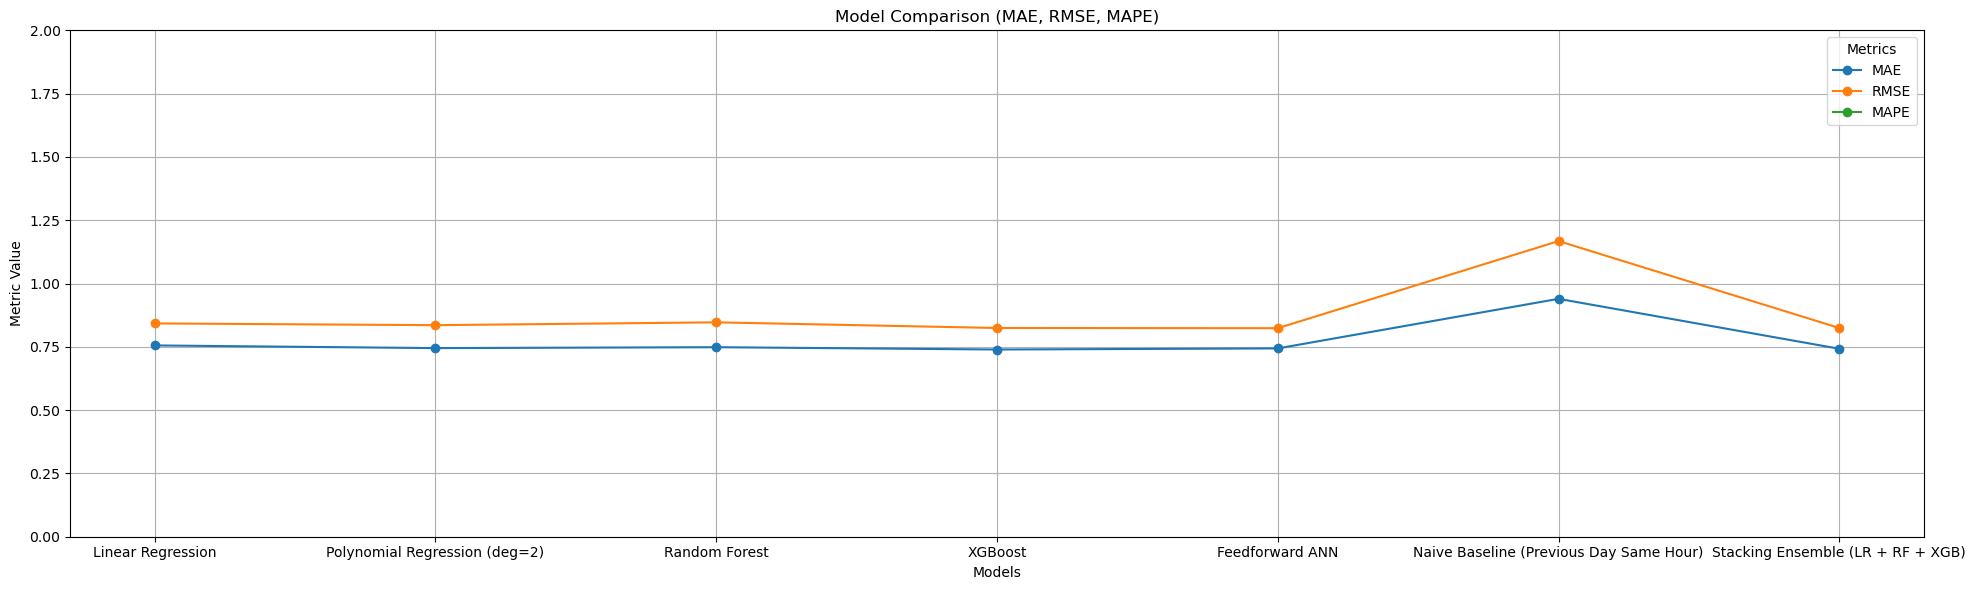

In [505]:
# Combine DataFrames into one
df_combined = pd.concat([results_df,model_results,ann_results, baseline_results, ensemble_results])

# Plot the data
plt.figure(figsize=(20,6))

# Loop through columns (MAE, RMSE, MAPE) and plot each on the same axes
for column in df_combined.columns:
    plt.plot(df_combined.index, df_combined[column], marker='o', label=column)

plt.ylim(0, 2)
# Add labels and title
plt.xlabel("Models")
plt.ylabel("Metric Value")
plt.title("Model Comparison (MAE, RMSE, MAPE)")
plt.legend(title="Metrics")
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()